# Exploratory Data Analysis 
Data set: NORS. Through NORS, CDC collects reports of enteric disease outbreaks caused by bacterial, viral, parasitic, chemical, toxin, and unknown agents, as well as foodborne and waterborne outbreaks of non-enteric disease.

About Data Set Variables: 
Foodborne outbreak data are provided for 1998–2017. For all other types of outbreaks, data are provided for 2009–2017.
Primary Mode: Way the disease was transmitted
Etiology: the cause of the outbreak. NORS Dashboard lets you select genus or name among bacterial, viral, parasitic, chemical, and toxic agents. You may also select “unknown.”
Sterotype or Genotype: 
Setting:
Hospitalizations: The number of hospitalizations reported
Info on Hospitalizations*: The number of ill people for whom information on hospitalization is available
Deaths: The number of deaths reported
Info on Deaths: The number of ill people for whom information on death is available

In [4]:
import numpy as np
import pandas as pd 

In [5]:
# read in file as csv
df = pd.read_csv("/Users/brookeathey/OneDrive - Texas State University/Spring 2020/Valkyrie Internship/NationalOutbreak_OutbreakData.csv")
print(df)

       Year  Month       State      Primary Mode  \
0      2009      1   Minnesota  Person-to-person   
1      2009      1   Minnesota              Food   
2      2009      2   Minnesota  Person-to-person   
3      2009      1   Minnesota  Person-to-person   
4      2009      1   Minnesota              Food   
...     ...    ...         ...               ...   
46019  2017      4     Florida              Food   
46020  2017     12     Florida              Food   
46021  2017     12  Multistate              Food   
46022  2017      5     Florida              Food   
46023  2014     11     Arizona              Food   

                                       Etiology Serotype or Genotype  \
0                        Norovirus Genogroup II              unknown   
1                                     Norovirus                  NaN   
2                                     Norovirus                  NaN   
3                             Norovirus unknown                  NaN   
4              

In [9]:
#Exploratary Data Analysis Begins \

df.head(5) # prints first 5 rows of data 

df.tail(5) #prints last 5 rows of data.

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,...,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify,Water Status
46019,2017,4,Florida,Food,Norovirus Genogroup II,NaN,Confirmed,Restaurant - Sit-down dining,10,0.0,...,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46020,2017,12,Florida,Food,NaN,NaN,NaN,Restaurant - Sit-down dining,4,0.0,...,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46021,2017,12,Multistate,Food,Salmonella enterica; Salmonella enterica,Montevideo; Cubana,Confirmed; Confirmed,Unknown,62,3.0,...,0.0,51.0,sprouts,NaN,Sprouts,NaN,NaN,NaN,NaN,NaN
46022,2017,5,Florida,Food,NaN,NaN,NaN,Restaurant - Sit-down dining,10,0.0,...,0.0,10.0,fish dip,NaN,Multiple,NaN,NaN,NaN,NaN,NaN
46023,2014,11,Arizona,Food,Bacillus cereus; Staphylococcus aureus,NaN,Suspected; Suspected,Unknown,65,1.0,...,0.0,65.0,"meat chili; potato salad; beans, unspecified; ...",NaN,Multiple,NaN,NaN,NaN,NaN,NaN


In [10]:
#Checking Data Types and shape
df.dtypes

Year                              int64
Month                             int64
State                            object
Primary Mode                     object
Etiology                         object
Serotype or Genotype             object
Etiology Status                  object
Setting                          object
Illnesses                         int64
Hospitalizations                float64
Info on Hospitalizations        float64
Deaths                          float64
Info on Deaths                  float64
Food Vehicle                     object
Food Contaminated Ingredient     object
IFSAC Category                   object
Water Exposure                   object
Water Type                       object
Animal Type                      object
Animal Type Specify              object
Water Status                     object
dtype: object

In [11]:
#describe the data 
df.describe

<bound method NDFrame.describe of        Year  Month       State      Primary Mode  \
0      2009      1   Minnesota  Person-to-person   
1      2009      1   Minnesota              Food   
2      2009      2   Minnesota  Person-to-person   
3      2009      1   Minnesota  Person-to-person   
4      2009      1   Minnesota              Food   
...     ...    ...         ...               ...   
46019  2017      4     Florida              Food   
46020  2017     12     Florida              Food   
46021  2017     12  Multistate              Food   
46022  2017      5     Florida              Food   
46023  2014     11     Arizona              Food   

                                       Etiology Serotype or Genotype  \
0                        Norovirus Genogroup II              unknown   
1                                     Norovirus                  NaN   
2                                     Norovirus                  NaN   
3                             Norovirus unknown      

In [12]:
#Check initial size of dataframe 
df.shape

(46024, 21)

In [13]:
#check for rows that are completely empty 
df.dropna(how='all')
df.shape

(46024, 21)

In [14]:
corrMatrix = df.corr()
print(corrMatrix)

                              Year     Month  Illnesses  Hospitalizations  \
Year                      1.000000 -0.102969   0.055581         -0.012878   
Month                    -0.102969  1.000000  -0.037754          0.001067   
Illnesses                 0.055581 -0.037754   1.000000          0.323250   
Hospitalizations         -0.012878  0.001067   0.323250          1.000000   
Info on Hospitalizations -0.013543 -0.047861   0.856005          0.252862   
Deaths                    0.019986 -0.000109   0.092446          0.333718   
Info on Deaths           -0.013756 -0.044112   0.885809          0.249799   

                          Info on Hospitalizations    Deaths  Info on Deaths  
Year                                     -0.013543  0.019986       -0.013756  
Month                                    -0.047861 -0.000109       -0.044112  
Illnesses                                 0.856005  0.092446        0.885809  
Hospitalizations                          0.252862  0.333718       

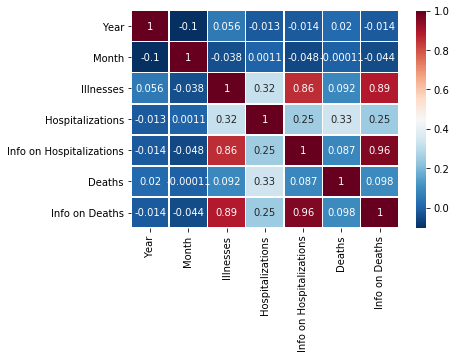

In [15]:
sd.heatmap(corrMatrix, annot=True,cmap='RdBu_r',linewidth=0.5)
#having issues with sizing
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [16]:
#locates where the missing data is. True = NAN
df.isnull()
# Depending on what we are looking at, could write an algorithim to fill in these values? Potentiall kNN?
#Print the rows where Etilogy is missing
print(df[df["Etiology"].isnull()])

       Year  Month     State      Primary Mode Etiology Serotype or Genotype  \
28     2009      1  Illinois              Food      NaN                  NaN   
30     2009      1  Illinois              Food      NaN                  NaN   
32     2009      1  Illinois              Food      NaN                  NaN   
33     2009      1  Illinois              Food      NaN                  NaN   
36     2009      1  Illinois              Food      NaN                  NaN   
...     ...    ...       ...               ...      ...                  ...   
46006  2017     12  New York  Person-to-person      NaN                  NaN   
46010  2017     12  New York  Person-to-person      NaN                  NaN   
46013  2017     12  New York  Person-to-person      NaN                  NaN   
46020  2017     12   Florida              Food      NaN                  NaN   
46022  2017      5   Florida              Food      NaN                  NaN   

      Etiology Status                  

In [ ]:
#I want to look at the rows that have an Etiology diagnosis. So I will take out the rows that have a missing Etiology. 
df_Etiology = df.loc[df['Etiology'].notna()]
#print(df_Etiology)
df_Etiology.shape


In [ ]:
#Find out how many rows didn't have an Etionogy 
(df.shape[0]-df_Etiology.shape[0])
(df.shape[0]-df_Etiology.shape[0])/df.shape[0] *100
#We lose 28% of our data here. ***Issues***
#df=df_Etiology
#print(df)

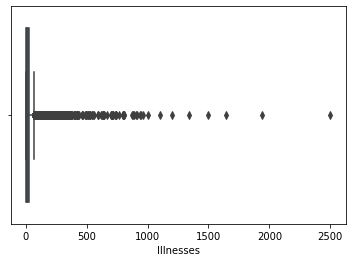

In [17]:
sd.boxplot(x=df['Illnesses'])

In [18]:
#Identify which column has the outliar points 
df.loc[df['Illnesses'] >= 1000]

,Year,Month,State,Primary Mode,Etiology,Serotype or Genotype,Etiology Status,Setting,Illnesses,Hospitalizations,...,Deaths,Info on Deaths,Food Vehicle,Food Contaminated Ingredient,IFSAC Category,Water Exposure,Water Type,Animal Type,Animal Type Specify,Water Status
7100,2010,2,Multistate,Food,Salmonella enterica,Enteritidis,Confirmed,Restaurant - Sit-down dining; Restaurant - oth...,1939,NaN,...,NaN,NaN,"shell egg, other",egg,Eggs,NaN,NaN,NaN,NaN,NaN
11230,2013,4,Alaska,Person-to-person,Norovirus Genogroup I,unknown,Confirmed,School/college/university,2500,0.0,...,0.0,2500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14188,2013,7,Illinois,Water,Plant/Herbal toxins,NaN,Suspected,Other,1341,0.0,...,0.0,NaN,NaN,NaN,NaN,Recreational water -- untreated,Pond,NaN,NaN,Reviewed
16241,2014,3,Indiana,Person-to-person,Shigella sonnei,subgroup D,Confirmed,"Other, specify",1101,53.0,...,0.0,1075.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27874,2006,4,Colorado,Food,Norovirus Genogroup I,NaN,Confirmed,NaN,1200,1.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31020,2006,5,California,Food,Campylobacter jejuni,NaN,Confirmed,Prison/jail,1644,7.0,...,0.0,NaN,"other milk, pasteurized",NaN,Dairy,NaN,NaN,NaN,NaN,NaN
31052,2008,4,Multistate,Food,Salmonella enterica,Saintpaul,Confirmed,NaN,1500,308.0,...,2.0,NaN,"peppers, jalapeno; tomato, unspecified; pepper...",NaN,Seeded Vegetables,NaN,NaN,NaN,NaN,NaN
43606,2017,4,Nevada,Person-to-person,Norovirus Genogroup II; Norovirus Genogroup I;...,GII.2; unknown - ; GII.3;,Confirmed; Confirmed; Confirmed; Confirmed,School/college/university,1000,0.0,...,0.0,279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
#Look at the number of illnesses by state 
#print(sorted(df['Etiology'].unique()))
df3 = df.groupby(['State'],as_index = False )['Illnesses'].sum()
display(df3)

,State,Illnesses
0,Alabama,5962
1,Alaska,5107
2,Arizona,22764
3,Arkansas,4456
4,California,43241
5,Colorado,23044
6,Connecticut,15622
7,Delaware,2093
8,Florida,26194
9,Georgia,14745


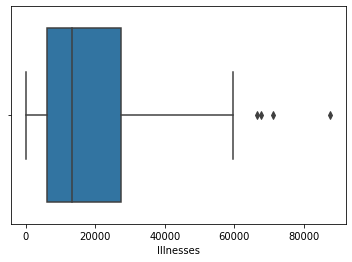

In [20]:
#Locate Outliers - based on the data this would potentially happen in cetrain columns only. We will look for outliars in the number of illness per etiology. 
sd.boxplot(x=df3['Illnesses'])

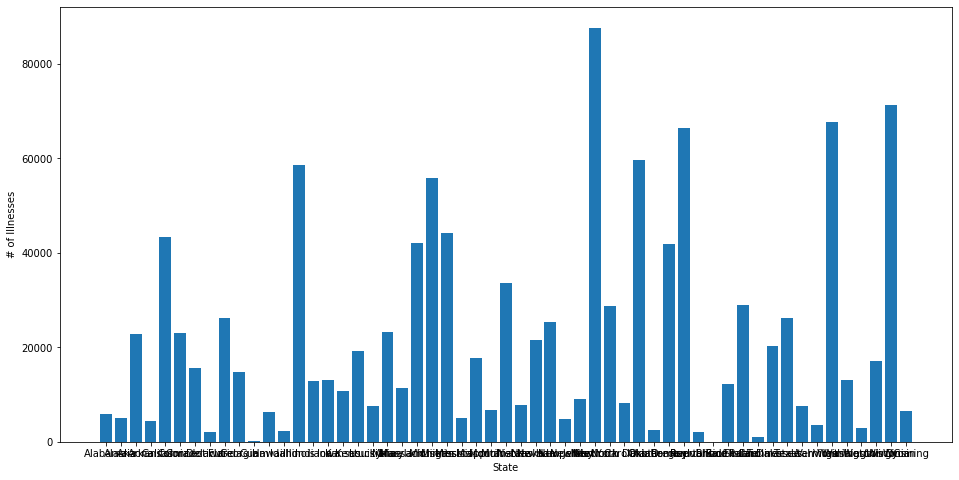

In [21]:
#Look at scatter plot of the data of Etiology vs. # Illnesses 
# First, 
fig, ax = plt.subplots(figsize=(16,8))
ax.bar(df3['State'] , df3['Illnesses'])
ax.set_xlabel('State')
ax.set_ylabel('# of Illnesses')
plt.show()
#We get an error because there are NaN values in the df. To deal with this, we will take out all of the rows that have no Etiology. 


In [22]:
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

In [25]:
#abbrev_us_state = dict(map(reversed,us_state_abbrev.items())
df3 = df3.replace({'State': us_state_abbrev})
print(df3)

                State Illnesses                                   text
0                  AL      5962          Alabama<br># of Illnesses5962
1                  AK      5107           Alaska<br># of Illnesses5107
2                  AZ     22764         Arizona<br># of Illnesses22764
3                  AR      4456         Arkansas<br># of Illnesses4456
4                  CA     43241      California<br># of Illnesses43241
5                  CO     23044        Colorado<br># of Illnesses23044
6                  CT     15622     Connecticut<br># of Illnesses15622
7                  DE      2093         Delaware<br># of Illnesses2093
8                  FL     26194         Florida<br># of Illnesses26194
9                  GA     14745         Georgia<br># of Illnesses14745
10               Guam       196              Guam<br># of Illnesses196
11                 HI      6211           Hawaii<br># of Illnesses6211
12                 ID      2273            Idaho<br># of Illnesses2273
13    

In [26]:
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [27]:
import plotly.graph_objects as go

import pandas as pd
df3 = df3

for col in df3.columns:
    df3[col] = df3[col].astype(str)

df3['text'] = df3['State'] + '<br>' + \
   '# of Illnesses' + df3['Illnesses'] 

fig = go.Figure(data=go.Choropleth(
    locations=df3['State'],
    z=df3['Illnesses'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    #text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Illness Count"
))

fig.update_layout(
    title_text='Illness Outbreak in USA from 2009-2017',
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        lakecolor='rgb(255, 255, 255)'),
)

fig.show()

In [28]:
df4 = df.groupby(['Year'],as_index = False )['Illnesses'].sum()
display(df4)

,Year,Illnesses
0,1998,27126
1,1999,24878
2,2000,25439
3,2001,25202
4,2002,24951
5,2003,23079
6,2004,29034
7,2005,19900
8,2006,28881
9,2007,21302


Text(0.5, 1.0, 'Number of Illnesses per year form 1998-2018')

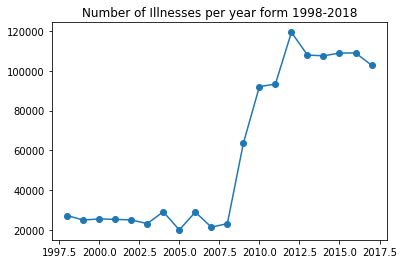

In [29]:
#x =plt.xticks(df4['Year'])
#y = plt.yticks(df4['Illnesses'])
#plt.xticks = ([1997,1999,2001,2003,2005,2007,2009,2013,2015,2017])
#plt.ticklabel_format(style='plain',axis='x',useOffset=False)
plt.plot(df4['Year'],df4['Illnesses'],'-o')
plt.title('Number of Illnesses per year form 1998-2018')

In [30]:
df5 = df.groupby(['Month'],as_index = False )['Illnesses'].sum()
display(df5)

,Month,Illnesses
0,1,192435
1,2,181263
2,3,147611
3,4,101185
4,5,69290
5,6,54572
6,7,50152
7,8,43404
8,9,44037
9,10,56772


In [31]:
monthDict={1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}

In [32]:
df5 = df5.replace({'Month': monthDict})
print(df5)

   Month  Illnesses
0    Jan     192435
1    Feb     181263
2    Mar     147611
3    Apr     101185
4    May      69290
5    Jun      54572
6    Jul      50152
7    Aug      43404
8    Sep      44037
9    Oct      56772
10   Nov      85947
11   Dec     151312


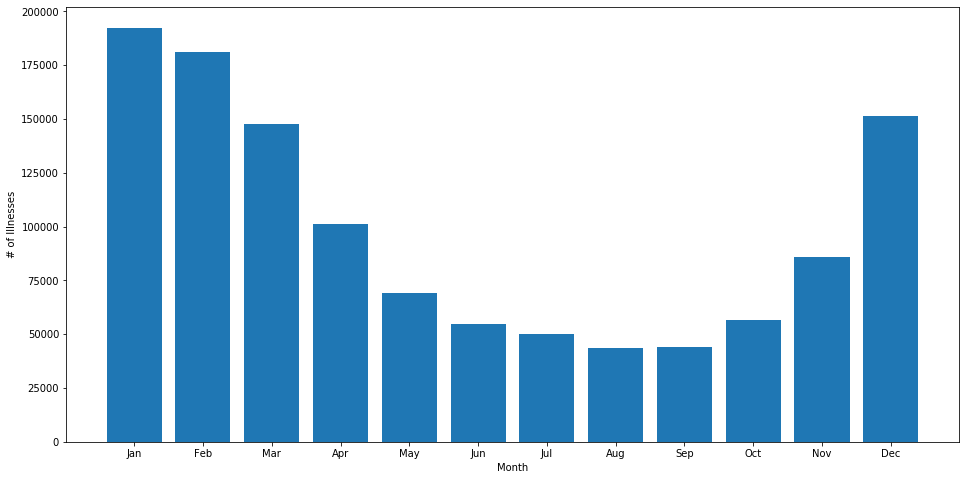

In [33]:
fig2, ax2 = plt.subplots(figsize=(16,8))
ax2.bar(df5['Month'] , df5['Illnesses'])
ax2.set_xlabel('Month')
ax2.set_ylabel('# of Illnesses')
plt.show()